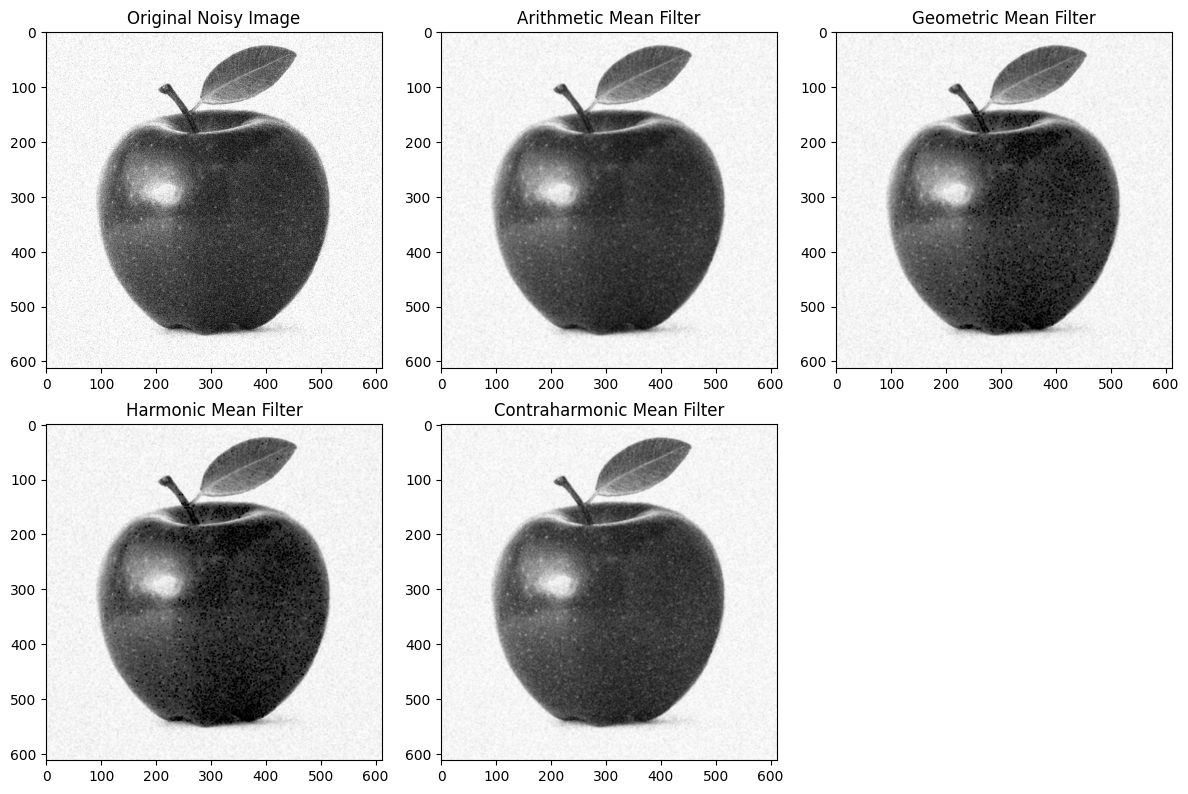

In [2]:
import numpy as np
import cv2

# Arithmetic Mean Filter
def arithmetic_mean_filter(image, kernel_size=3):
    return cv2.blur(image, (kernel_size, kernel_size))

# Geometric Mean Filter
def geometric_mean_filter(image, kernel_size=3):
    pad_size = kernel_size // 2
    padded_image = np.pad(image, pad_size, mode='reflect')
    result = np.zeros_like(image, dtype=np.float32)

    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            window = padded_image[i:i+kernel_size, j:j+kernel_size]
            result[i, j] = np.exp(np.mean(np.log(window + 1e-5)))  # avoid log(0)
    
    return np.clip(result, 0, 255).astype(np.uint8)

# Harmonic Mean Filter
def harmonic_mean_filter(image, kernel_size=3):
    pad_size = kernel_size // 2
    padded_image = np.pad(image, pad_size, mode='reflect')
    result = np.zeros_like(image, dtype=np.float32)

    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            window = padded_image[i:i+kernel_size, j:j+kernel_size]
            result[i, j] = kernel_size * kernel_size / np.sum(1.0 / (window + 1e-5))  # avoid division by zero
    
    return np.clip(result, 0, 255).astype(np.uint8)

# Contraharmonic Mean Filter
def contraharmonic_mean_filter(image, kernel_size=3, Q=1.5):
    pad_size = kernel_size // 2
    padded_image = np.pad(image, pad_size, mode='reflect')
    result = np.zeros_like(image, dtype=np.float32)

    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            window = padded_image[i:i+kernel_size, j:j+kernel_size]
            numerator = np.sum(np.power(window, Q + 1))
            denominator = np.sum(np.power(window, Q))
            result[i, j] = numerator / (denominator + 1e-5)  # avoid division by zero
    
    return np.clip(result, 0, 255).astype(np.uint8)

# Test Filters on a Noisy Image
if __name__ == "__main__":
        # Load a sample grayscale image and add Gaussian noise
    image = cv2.imread('../../images/apple.jpg', cv2.IMREAD_GRAYSCALE)
    # image = np.ones((100, 100), dtype=np.float32) * 128  # Uniform gray image
    noise = np.random.normal(0, 25, image.shape)         # Gaussian noise
    noisy_image = np.clip(image + noise, 0, 255).astype(np.uint8)

    # Apply Filters
    arithmetic_mean_result = arithmetic_mean_filter(noisy_image, kernel_size=3)
    geometric_mean_result = geometric_mean_filter(noisy_image, kernel_size=3)
    harmonic_mean_result = harmonic_mean_filter(noisy_image, kernel_size=3)
    contraharmonic_mean_result = contraharmonic_mean_filter(noisy_image, kernel_size=3, Q=1.5)

    # Display results
    import matplotlib.pyplot as plt
    plt.figure(figsize=(12, 8))

    plt.subplot(2, 3, 1)
    plt.title("Original Noisy Image")
    plt.imshow(noisy_image, cmap='gray')

    plt.subplot(2, 3, 2)
    plt.title("Arithmetic Mean Filter")
    plt.imshow(arithmetic_mean_result, cmap='gray')

    plt.subplot(2, 3, 3)
    plt.title("Geometric Mean Filter")
    plt.imshow(geometric_mean_result, cmap='gray')

    plt.subplot(2, 3, 4)
    plt.title("Harmonic Mean Filter")
    plt.imshow(harmonic_mean_result, cmap='gray')

    plt.subplot(2, 3, 5)
    plt.title("Contraharmonic Mean Filter")
    plt.imshow(contraharmonic_mean_result, cmap='gray')

    plt.tight_layout()
    plt.show()


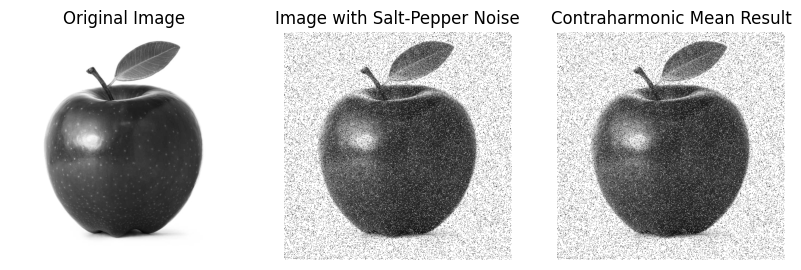

In [7]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def add_salt_pepper_noise(image, salt_prob=0.02, pepper_prob=0.02):
    """
    Add salt-and-pepper noise to an image.
    
    Parameters:
    - image: Input grayscale image (numpy array).
    - salt_prob: Probability of salt noise (white pixels).
    - pepper_prob: Probability of pepper noise (black pixels).
    
    Returns:
    - Noisy image with salt-and-pepper noise added.
    """
    noisy_image = image.copy()
    total_pixels = image.size

    # Add salt noise
    num_salt = int(total_pixels * salt_prob)
    coords = [np.random.randint(0, i - 1, num_salt) for i in image.shape]
    noisy_image[coords[0], coords[1]] = 255

    # Add pepper noise
    num_pepper = int(total_pixels * pepper_prob)
    coords = [np.random.randint(0, i - 1, num_pepper) for i in image.shape]
    noisy_image[coords[0], coords[1]] = 0

    return noisy_image

# Test the function
if __name__ == "__main__":
    # Load a sample grayscale image
    # image = np.ones((100, 100), dtype=np.uint8) * 128  # Uniform gray image
    image = cv2.imread('../../images/apple.jpg', cv2.IMREAD_GRAYSCALE)

    # Add salt-and-pepper noise
    noisy_image = add_salt_pepper_noise(image, salt_prob=0.07, pepper_prob=0.1)
    contraharmonic_mean_result = contraharmonic_mean_filter(noisy_image, kernel_size=3, Q=1.5)


    # Display the original and noisy images
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 3, 1)
    plt.title("Original Image")
    plt.imshow(image, cmap='gray')
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.title("Image with Salt-Pepper Noise")
    plt.imshow(noisy_image, cmap='gray')
    plt.axis('off')
    
    plt.subplot(1, 3, 3)
    plt.title("Contraharmonic Mean Result")
    plt.imshow(noisy_image, cmap='gray')
    plt.axis('off')

    plt.show()
